In [93]:
import pandas as pd
import numpy as np
import pickle
!pip install xgboost --upgrade
from sklearn import metrics
import time

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# loading label encoders

In [64]:
pkl_file = open('/content/drive/MyDrive/case_study_weights/saved_label_dict_save.pkl', 'rb')
load_label = pickle.load(pkl_file) 
pkl_file.close()

# loading CalibratedClassifier with base_estimator = XGBClassifier

In [65]:
pkl_file = open('/content/drive/MyDrive/case_study_weights/sig_clf_save.pkl', 'rb')
load_sig_clf = pickle.load(pkl_file) 
pkl_file.close()
load_sig_clf

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1,
                                                    enable_categorical=False,
                                                    gamma=0, gpu_id=-1,
                                                    importance_type=None,
                                                    interaction_constraints='',
                                                    learning_rate=0.300000012,
                                                    max_delta_step=0,
                                                    max_depth=6,
                                                    min_child_weight=1,
                                                    mis

# loading extra data

In [66]:
pkl_file = open('/content/drive/MyDrive/case_study_weights/num_col.pkl', 'rb')
num_col = pickle.load(pkl_file) 
pkl_file.close()
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'Service_Utilization'],
      dtype='object')

# loading raw data for predictions

In [67]:
data = pd.read_csv('/content/drive/MyDrive/case_study_1/diabetic_data.csv')

data_ = data.drop(['encounter_id', 'patient_nbr','weight','readmitted','glimepiride-pioglitazone','metformin-pioglitazone',
                   'metformin-rosiglitazone','citoglipton','glipizide-metformin','acetohexamide','examide',
 'tolazamide','troglitazone','chlorpropamide','miglitol','tolbutamide'], axis=1)

new_target = data['readmitted'].replace('>30','NO')
print(new_target.unique())
new_target = new_target.replace({ 'NO' : 0, '<30' : 1 })

['NO' '<30']


# predict function

In [72]:
def predict(quary) :
  # preprocessing on quary point
  quary = quary.replace('?','Missing')
  num_data = quary[num_col[:-1]]
  survice = num_data['number_outpatient']+num_data['number_emergency']+num_data['number_inpatient']
  num_data = num_data.apply(lambda x : np.log(x+1))
  quary[num_col[:-1]] = num_data
  quary[num_col[-1]] = survice
  # label encoding
  for lb in load_label.keys():
    label = load_label[lb]
    label = load_label[lb]
    quary[lb] = label.transform(np.array([quary[lb]]))[0]
  # predicting
  sig_clf_probs = load_sig_clf.predict_proba(np.array(quary).reshape(1,-1))
  y_pred = load_sig_clf.predict(np.array(quary).reshape(1,-1))
  print('predictions = ',sig_clf_probs[0])
  return y_pred[0], sig_clf_probs

#final_1

In [73]:
def final_1(quary):
  pre ,proba = predict(quary)
  if pre==1:
    print('Yes, patient will be readmitted within 30 days')
  else:
    print('No, patient will not be readmitted within 30 days')

In [74]:
final_1(data_.iloc[99])

predictions =  [0.16292101 0.83707899]
Yes, patient will be readmitted within 30 days


In [91]:
final_1(data_.iloc[34])

predictions =  [0.94579659 0.05420341]
No, patient will not be readmitted within 30 days


In [75]:
final_1(data_.iloc[9])

predictions =  [0.8606573 0.1393427]
No, patient will not be readmitted within 30 days


# Final_2

In [87]:
def final_2(quary, ture_val):
  pre ,proba = predict(quary)
  logloss = metrics.log_loss([ture_val],proba,labels=[0,1])
  print('logg loss is :',logloss)
  if pre==1:
    print('Yes, patient will be readmitted within 30 days')
  else:
    print('No, patient will not be readmitted within 30 days')

In [90]:
quary = data_.iloc[345]
ture_val = new_target.iloc[345]
final_2(quary, ture_val)

predictions =  [0.93745178 0.06254822]
logg loss is : 0.06458995967949423
No, patient will not be readmitted within 30 days


In [89]:
quary = data_.iloc[13]
ture_val = new_target.iloc[13]
final_2(quary, ture_val)

predictions =  [0.87968118 0.12031882]
logg loss is : 0.12819572874678273
No, patient will not be readmitted within 30 days


In [88]:
quary = data_.iloc[99]
ture_val = new_target.iloc[99]
final_2(quary, ture_val)

predictions =  [0.16292101 0.83707899]
logg loss is : 1.8144897879723227
Yes, patient will be readmitted within 30 days


# time taken 

In [94]:
quary = data_.iloc[87]
begin = time.time()
pre ,proba = predict(quary)
end = time.time()
print('time taken by program is :',end-begin)

predictions =  [0.88346499 0.11653501]
time taken by program is : 0.0553746223449707


In [95]:
quary = data_.iloc[7]
begin = time.time()
pre ,proba = predict(quary)
end = time.time()
print('time taken by program is :',end-begin)

predictions =  [0.93186463 0.06813537]
time taken by program is : 0.05741763114929199


In [96]:
quary = data_.iloc[58]
begin = time.time()
pre ,proba = predict(quary)
end = time.time()
print('time taken by program is :',end-begin)

predictions =  [0.8811045 0.1188955]
time taken by program is : 0.0738227367401123


# DEPLOYMENT


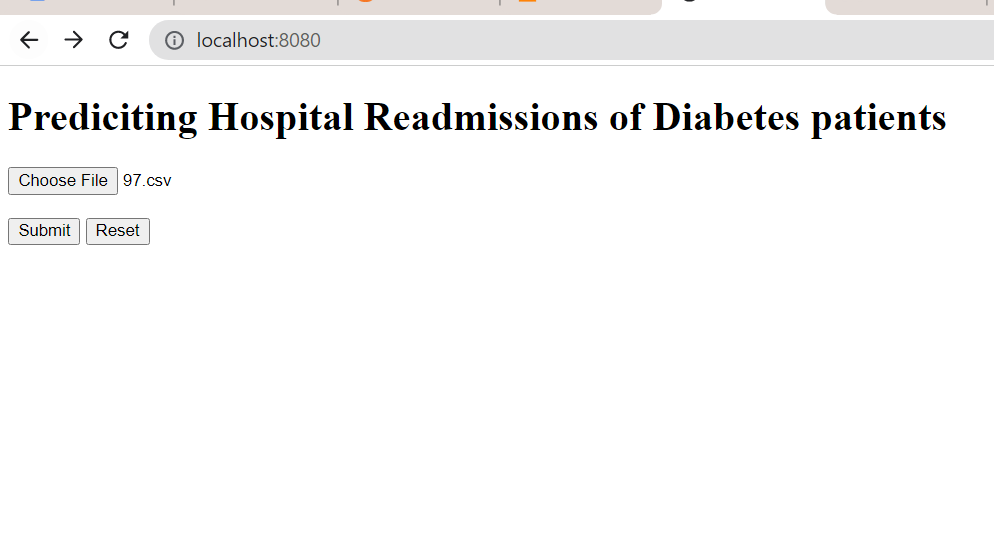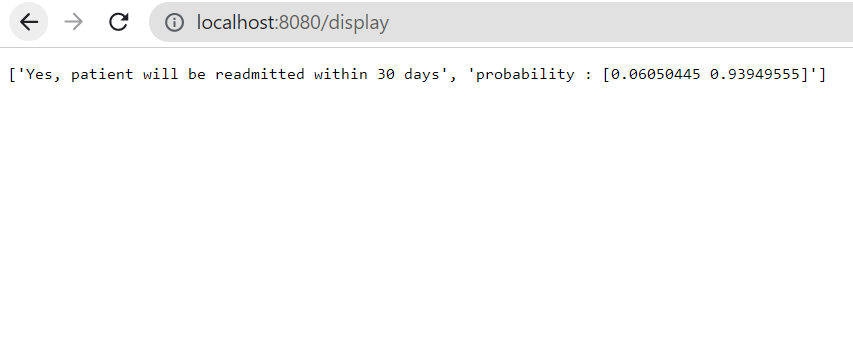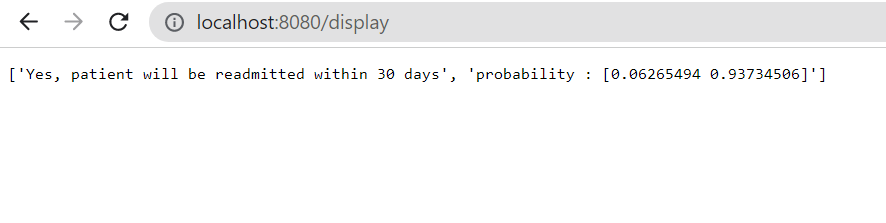

# VIDEO LINK

In [ ]:
https://drive.google.com/file/d/1vgSXfvoLVw7Hr4fVOw_crXXsmTwaHmLD/view?usp=sharing